# WEEK-11

AIM: Write a program for character recognition using CNN.

In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

C:\Users\lokes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

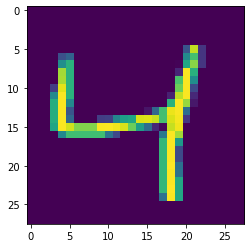

In [5]:
# converting pixel value to image
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
# to get all image pixels into similar range then we should divide the with 255 because image pixel range is in between 0 to 255
X_train = X_train/255
X_test = X_test/255
X_train[0]
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# we are using flatten because the data is in 2d array.flatten converts higher dimensional array to 1-d array
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = "relu"))#input layers
model.add(Dense(32,activation = "relu"))
model.add(Dense(10,activation = "softmax")) #output layers

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# loss = sparse use then one hot encoding not done
# loss = categorical_classentropy then one hot encoding done

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(X_train,y_train,epochs = 25,validation_split = 0.2)

Epoch 1/25


1500/1500 [==============================] - 11s 6ms/step - loss: 0.2767 - accuracy: 0.9189 - val_loss: 0.1470 - val_accuracy: 0.9552
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1202 - accuracy: 0.9635 - val_loss: 0.1079 - val_accuracy: 0.9675
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0832 - accuracy: 0.9750 - val_loss: 0.0999 - val_accuracy: 0.9709
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.1001 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.1018 - val_accuracy: 0.9720
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.1130 - val_accura

In [11]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 3ms/step


array([[4.88291925e-22, 5.04600543e-19, 2.18160925e-13, ...,
        1.00000000e+00, 4.72874289e-19, 1.00845075e-15],
       [4.62854070e-23, 2.52676542e-13, 1.00000000e+00, ...,
        2.18273173e-18, 3.59824475e-13, 1.60813348e-24],
       [1.86116868e-11, 1.00000000e+00, 3.96712219e-10, ...,
        4.68764902e-08, 1.02029505e-08, 5.57136965e-13],
       ...,
       [4.96288193e-29, 1.74500233e-21, 9.62616680e-29, ...,
        1.11895823e-19, 8.63211442e-18, 2.52461939e-15],
       [3.95896913e-23, 8.03806812e-25, 3.29732160e-31, ...,
        3.06299744e-26, 5.28585872e-07, 2.43530779e-27],
       [1.16579202e-22, 3.95944203e-29, 5.60200081e-26, ...,
        7.88854500e-36, 3.46795308e-23, 3.55256139e-32]], dtype=float32)

In [12]:
y_pred = y_prob.argmax(axis = 1) # it gives which index has maximum value

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

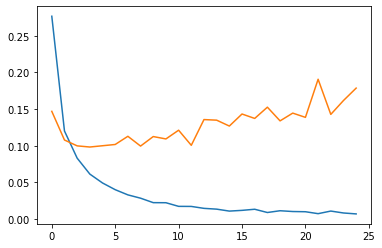

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

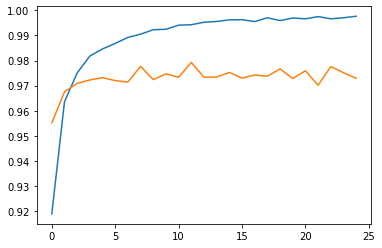

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])